## Librerías

In [178]:
from sklearn.model_selection import train_test_split
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import cross_val_score, KFold
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

## Datos

In [179]:
df = housing

## Primer Analisis

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [181]:
df.shape

(20640, 10)

In [182]:
df.tail()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND

In [183]:
df.describe(include='all')

longitude      latitude  housing_median_age   total_rooms  \
count   20640.000000  20640.000000        20640.000000  20640.000000   
unique           NaN           NaN                 NaN           NaN   
top              NaN           NaN                 NaN           NaN   
freq             NaN           NaN                 NaN           NaN   
mean     -119.569704     35.631861           28.639486   2635.763081   
std         2.003532      2.135952           12.585558   2181.615252   
min      -124.350000     32.540000            1.000000      2.000000   
25%      -121.800000     33.930000           18.000000   1447.750000   
50%      -118.490000     34.260000           29.000000   2127.000000   
75%      -118.010000     37.710000           37.000000   3148.000000   
max      -114.310000     41.950000           52.000000  39320.000000   

        total_bedrooms    population    households  median_income  \
count     20433.000000  20640.000000  20640.000000   20640.000000   
unique             NaN           NaN           NaN            NaN   
top                NaN           NaN           NaN            NaN   
freq               NaN           NaN           NaN            NaN   
mean        537.870553   1425.476744    499.539680       3.870671   
std         421.385070   1132.462122    382.329753       1.899822   
min           1.000000      3.000000      1.000000       0.499900   
25%         296.000000    787.000000    280.000000       2.563400   
50%         435.000000   1166.000000    409.000000       3.534800   
75%         647.000000   1725.000000    605.000000       4.743250   
max        6445.000000  35682.000000   6082.000000      15.000100   

        median_house_value ocean_proximity  
count         20640.000000           20640  
unique                 NaN               5  
top                    NaN       <1H OCEAN  
freq                   NaN            9136  
mean         206855.816909             NaN  
std          115395.615874             NaN  
min           14999.000000             NaN  
25%          119600.000000             NaN  
50%          179700.000000             NaN  
75%          264725.000000             NaN  
max          500001.000000             NaN

In [184]:
def box_plot(data):
    plt.figure(figsize=(20,4))
    sns.boxplot(data, orient='h')

    media = data.mean()
    mediana = data.median()

    plt.axvline(media, color = 'r', linestyle = 'dashed', linewidth = 1)
    plt.axvline(mediana, color = 'g', linestyle = 'dashed', linewidth = 1)
    plt.show()

In [185]:
def box_plot_conjunto(data):
    for i in data:
        print(f"Variable {i}")
        print(data[i].describe())
        plt.figure(figsize=(20,4))
        sns.boxplot(data[i], orient='h')
        media = data[i].mean()
        mediana = data[i].median()

        plt.axvline(media, color = 'r', linestyle = 'dashed', linewidth = 1)
        plt.axvline(mediana, color = 'g', linestyle = 'dashed', linewidth = 1)

        plt.show()

Variable longitude
count    20640.000000
mean      -119.569704
std          2.003532
min       -124.350000
25%       -121.800000
50%       -118.490000
75%       -118.010000
max       -114.310000
Name: longitude, dtype: float64


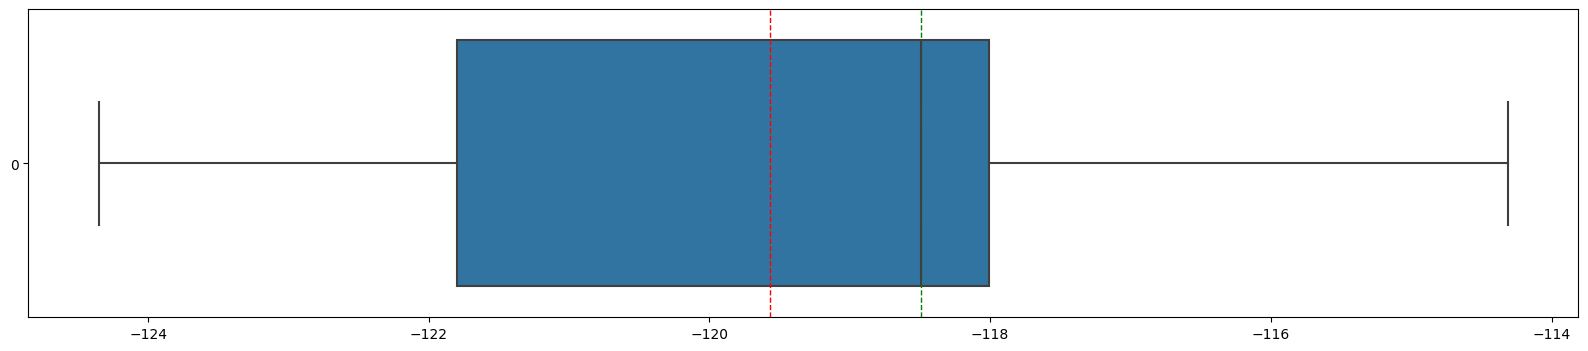

Variable latitude
count    20640.000000
mean        35.631861
std          2.135952
min         32.540000
25%         33.930000
50%         34.260000
75%         37.710000
max         41.950000
Name: latitude, dtype: float64


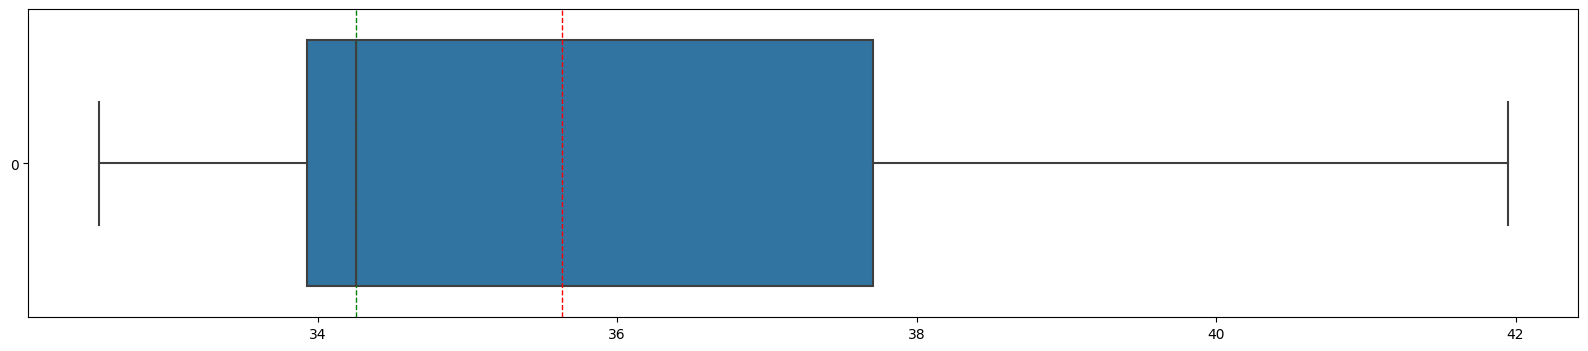

Variable housing_median_age
count    20640.000000
mean        28.639486
std         12.585558
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: housing_median_age, dtype: float64


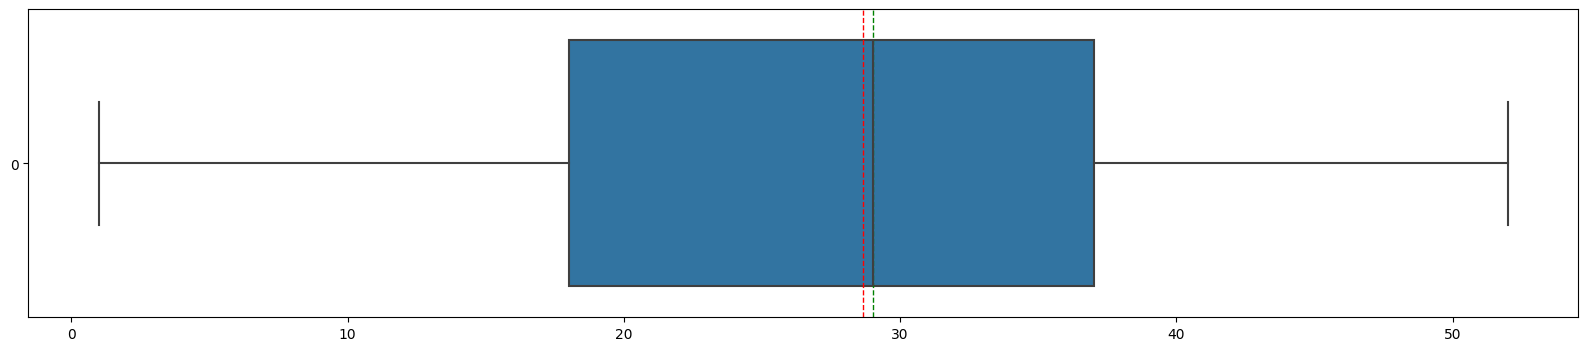

Variable total_rooms
count    20640.000000
mean      2635.763081
std       2181.615252
min          2.000000
25%       1447.750000
50%       2127.000000
75%       3148.000000
max      39320.000000
Name: total_rooms, dtype: float64


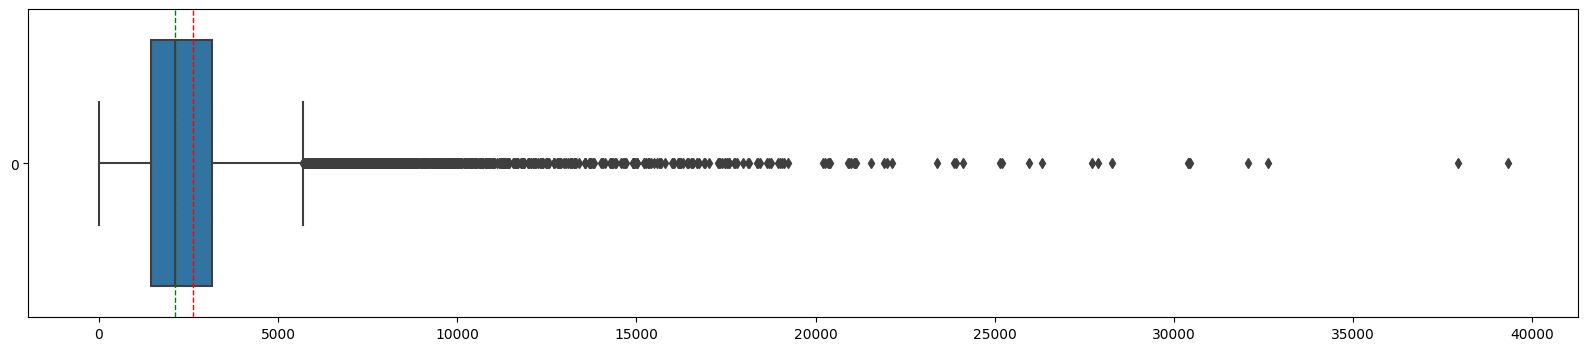

Variable total_bedrooms
count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64


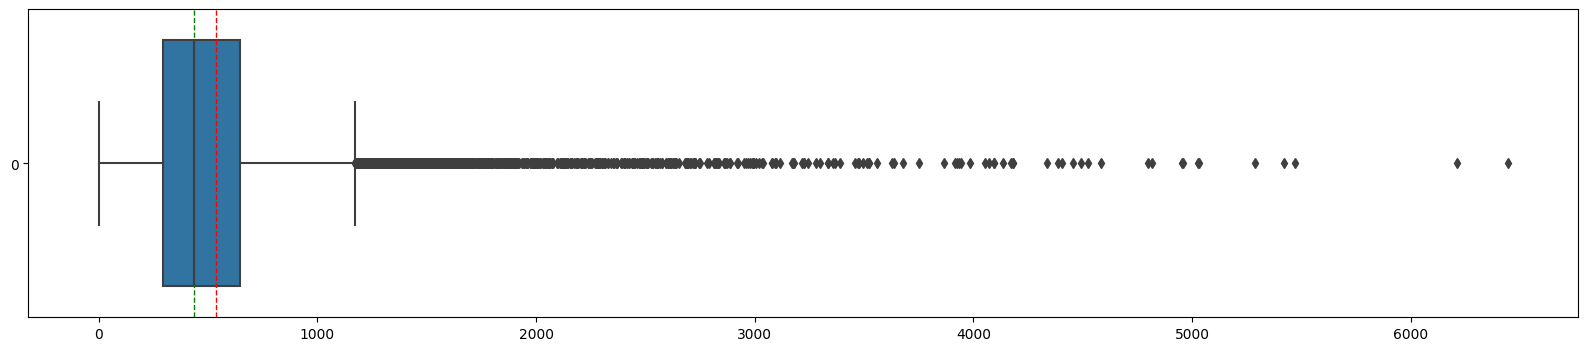

Variable population
count    20640.000000
mean      1425.476744
std       1132.462122
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max      35682.000000
Name: population, dtype: float64


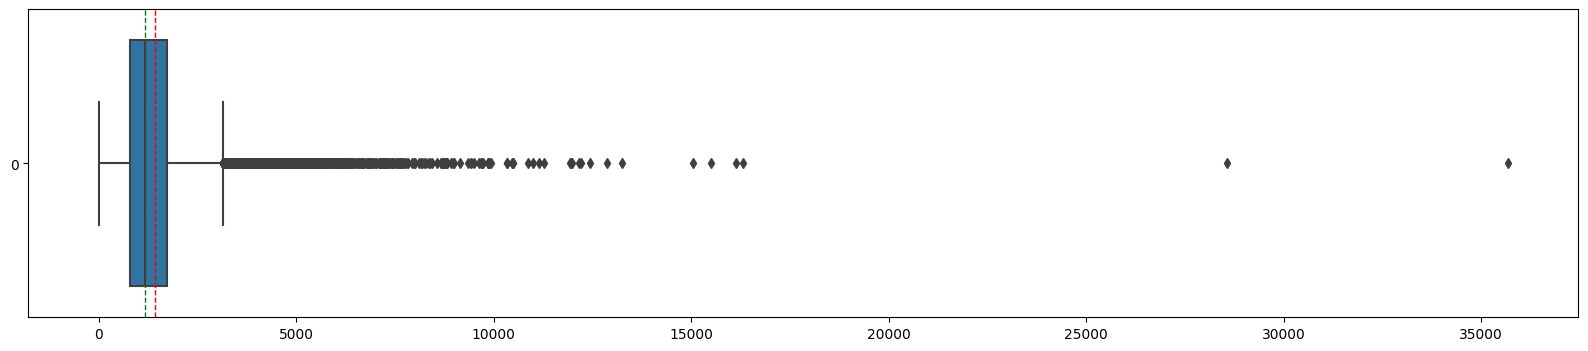

Variable households
count    20640.000000
mean       499.539680
std        382.329753
min          1.000000
25%        280.000000
50%        409.000000
75%        605.000000
max       6082.000000
Name: households, dtype: float64


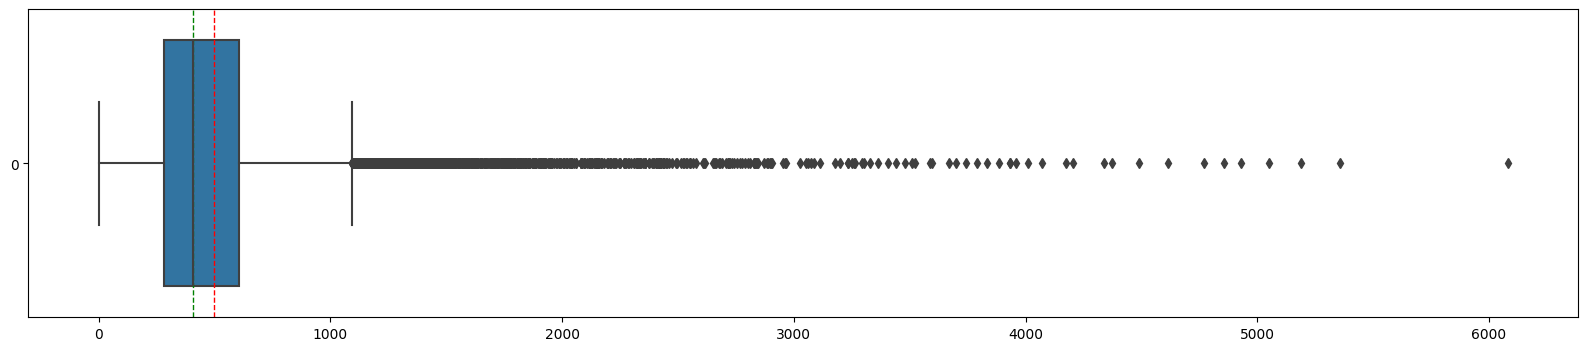

Variable median_income
count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64


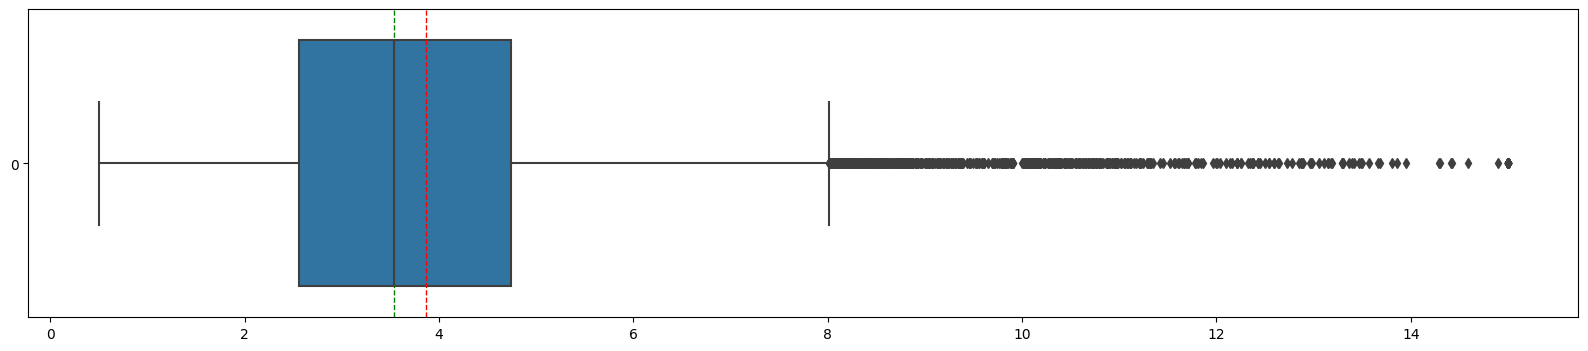

Variable median_house_value
count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64


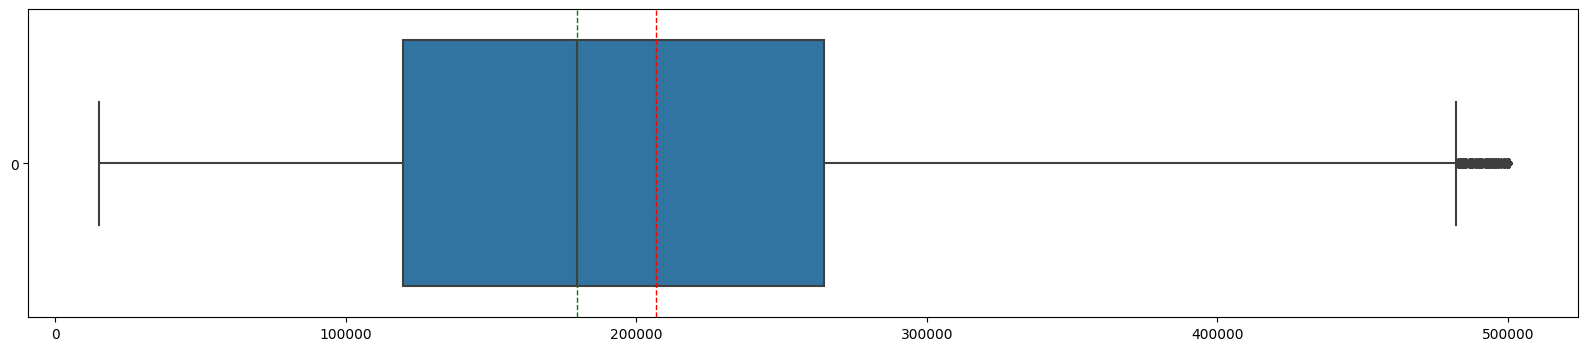

In [186]:
box_plot_conjunto(df.select_dtypes(include='number'))

In [187]:
def graficos_variables_cualit(data):
    try:
        for columna in data.columns:
            print('--'*50)
            print(f"VARIABLE: {columna}\n")
            if len(data[columna].dropna().unique()) > 1:
                ax = sns.countplot(data= data.sort_values(by=columna), x= columna, palette='husl')
                ax.set_xticklabels(data[columna].sort_values().unique(), rotation=90)
                plt.title(f"Conteo variable {columna}")
                plt.show();
            else:
                print('No es necesario graficar porque tiene un solo valor dentro de la columna')
            print(data[columna].value_counts())
            print('--'*50)
    except Exception as a:
        print(f"No puedo analizar la variable por este error {a}")

----------------------------------------------------------------------------------------------------
VARIABLE: ocean_proximity



c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


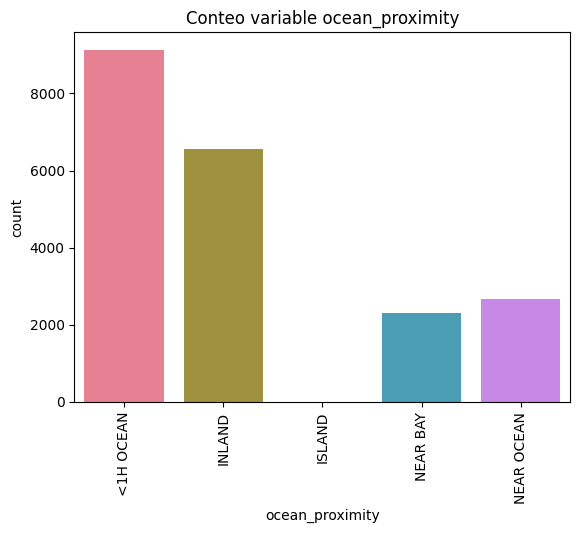

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------


In [188]:
graficos_variables_cualit(df.select_dtypes(exclude='number'))

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

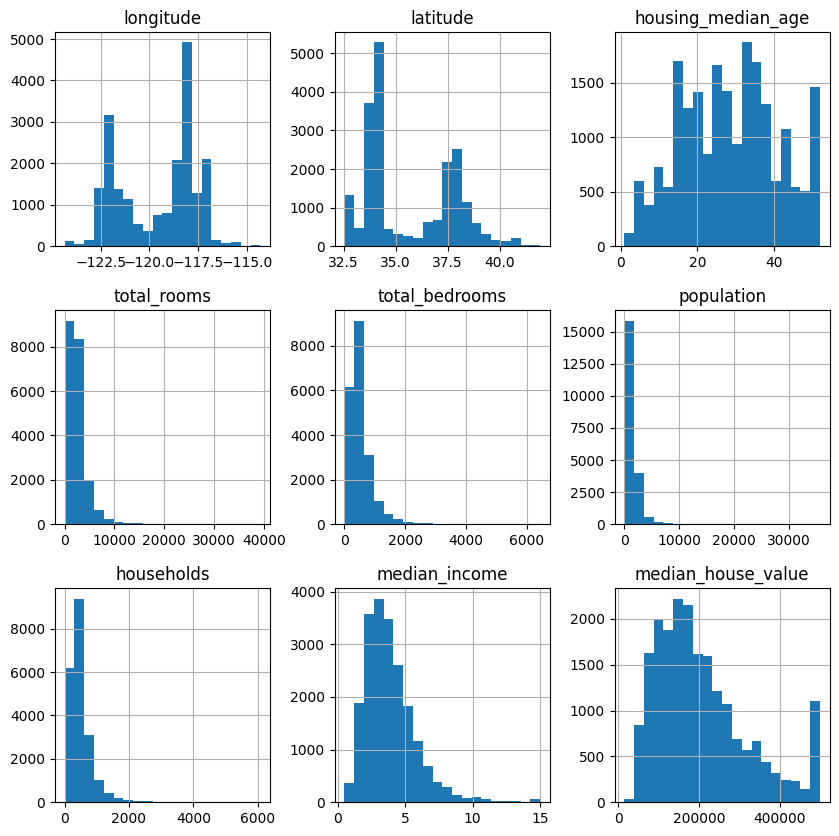

In [189]:
df.hist(bins=20, figsize=(10,10))

## EDA

In [190]:
from ydata_profiling import ProfileReport

In [191]:
profile = ProfileReport(df, title = "Pandas Profiling Report")

In [192]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Tratamiento de valores atípico y missing

In [193]:
df.dropna(inplace=True)

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


## División de los datos

#### train --> {train - validation}
#### test

In [195]:
X_train_set, y_test_set = train_test_split(df, test_size = 0.20, random_state = 42)

In [196]:
X = X_train_set.drop(columns = ['median_house_value'], axis=1)
y = X_train_set[['median_house_value']].copy()

In [197]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [198]:
X_train.reset_index(inplace=True, drop=True)

In [199]:
X_val.reset_index(inplace=True, drop=True)

In [200]:
X_train.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -119.17     34.17                34.0       2749.0           539.0   
1    -118.10     34.08                24.0       4510.0          1296.0   
2    -117.99     33.74                26.0       4065.0           741.0   
3    -122.09     41.32                52.0       4019.0           824.0   
4    -118.27     34.92                20.0        873.0           175.0   

   population  households  median_income ocean_proximity  
0      2330.0       559.0         4.2137      NEAR OCEAN  
1      3985.0      1240.0         2.6884       <1H OCEAN  
2      1960.0       739.0         4.5060       <1H OCEAN  
3      1728.0       706.0         2.2462          INLAND  
4       422.0       159.0         2.9583          INLAND

In [201]:
X_val.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -118.08     34.09                32.0       3214.0           718.0   
1    -118.34     33.93                32.0       1254.0           399.0   
2    -118.19     33.99                40.0       1547.0           434.0   
3    -117.87     33.82                26.0       2435.0           346.0   
4    -117.36     33.99                42.0       1178.0           261.0   

   population  households  median_income ocean_proximity  
0      2316.0       751.0         3.7066       <1H OCEAN  
1      1281.0       386.0         2.2976       <1H OCEAN  
2      1930.0       427.0         3.3869       <1H OCEAN  
3      1088.0       350.0         5.9397       <1H OCEAN  
4       804.0       283.0         2.9688          INLAND

Aplicar One hot encoder a los valores que tenemos en el train

In [202]:
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded = enc.fit_transform(X_train[['ocean_proximity']])
encoded_df = pd.DataFrame(encoded, columns=enc.get_feature_names_out(['ocean_proximity']))

train_encoded = pd.concat([X_train, encoded_df], axis=1)
train_encoded.drop(['ocean_proximity'], axis=1, inplace=True)

c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [203]:
train_encoded

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -119.17     34.17                34.0       2749.0           539.0   
1        -118.10     34.08                24.0       4510.0          1296.0   
2        -117.99     33.74                26.0       4065.0           741.0   
3        -122.09     41.32                52.0       4019.0           824.0   
4        -118.27     34.92                20.0        873.0           175.0   
...          ...       ...                 ...          ...             ...   
13071    -117.08     32.76                18.0       1704.0           596.0   
13072    -121.32     38.64                19.0       8501.0          1558.0   
13073    -118.34     33.80                33.0       2194.0           469.0   
13074    -122.27     37.77                52.0       1731.0           377.0   
13075    -118.31     33.84                 5.0       3559.0           869.0   

       population  households  median_income  ocean_proximity_<1H OCEAN  \
0          2330.0       559.0         4.2137                        0.0   
1          3985.0      1240.0         2.6884                        1.0   
2          1960.0       739.0         4.5060                        1.0   
3          1728.0       706.0         2.2462                        0.0   
4           422.0       159.0         2.9583                        0.0   
...           ...         ...            ...                        ...   
13071      1639.0       548.0         1.7391                        0.0   
13072      3576.0      1467.0         3.6523                        0.0   
13073       987.0       397.0         5.0951                        1.0   
13074       872.0       363.0         4.1667                        0.0   
13075      2965.0       794.0         2.6491                        1.0   

       ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                         0.0                     0.0   
1                         0.0                     0.0   
2                         0.0                     0.0   
3                         1.0                     0.0   
4                         1.0                     0.0   
...                       ...                     ...   
13071                     0.0                     0.0   
13072                     1.0                     0.0   
13073                     0.0                     0.0   
13074                     0.0                     0.0   
13075                     0.0                     0.0   

       ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
0                           0.0                         1.0  
1                           0.0                         0.0  
2                           0.0                         0.0  
3                           0.0                         0.0  
4                           0.0                         0.0  
...                         ...                         ...  
13071                       0.0                         1.0  
13072                       0.0                         0.0  
13073                       0.0                         0.0  
13074                       1.0                         0.0  
13075                       0.0                         0.0  

[13076 rows x 13 columns]

Aplicamos lo mismo al test

In [204]:
encoded = enc.transform(X_val[['ocean_proximity']])
encoded_df = pd.DataFrame(encoded, columns=enc.get_feature_names_out(['ocean_proximity']))

X_val_encoded = pd.concat([X_val, encoded_df], axis=1)
X_val_encoded.drop(['ocean_proximity'], axis=1, inplace=True)

In [205]:
X_val_encoded

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0       -118.08     34.09                32.0       3214.0           718.0   
1       -118.34     33.93                32.0       1254.0           399.0   
2       -118.19     33.99                40.0       1547.0           434.0   
3       -117.87     33.82                26.0       2435.0           346.0   
4       -117.36     33.99                42.0       1178.0           261.0   
...         ...       ...                 ...          ...             ...   
3265    -121.78     37.66                25.0       1947.0           418.0   
3266    -122.20     38.09                18.0       6860.0          1079.0   
3267    -117.87     33.60                20.0       3212.0           572.0   
3268    -122.42     37.75                52.0       1974.0           525.0   
3269    -118.12     34.06                35.0       1729.0           438.0   

      population  households  median_income  ocean_proximity_<1H OCEAN  \
0         2316.0       751.0         3.7066                        1.0   
1         1281.0       386.0         2.2976                        1.0   
2         1930.0       427.0         3.3869                        1.0   
3         1088.0       350.0         5.9397                        1.0   
4          804.0       283.0         2.9688                        0.0   
...          ...         ...            ...                        ...   
3265       900.0       354.0         3.8523                        0.0   
3266      3205.0      1058.0         5.2957                        0.0   
3267      1064.0       526.0         6.6155                        1.0   
3268       935.0       465.0         2.7173                        0.0   
3269      1308.0       412.0         2.5321                        1.0   

      ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                        0.0                     0.0   
1                        0.0                     0.0   
2                        0.0                     0.0   
3                        0.0                     0.0   
4                        1.0                     0.0   
...                      ...                     ...   
3265                     1.0                     0.0   
3266                     0.0                     0.0   
3267                     0.0                     0.0   
3268                     0.0                     0.0   
3269                     0.0                     0.0   

      ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
0                          0.0                         0.0  
1                          0.0                         0.0  
2                          0.0                         0.0  
3                          0.0                         0.0  
4                          0.0                         0.0  
...                        ...                         ...  
3265                       0.0                         0.0  
3266                       1.0                         0.0  
3267                       0.0                         0.0  
3268                       1.0                         0.0  
3269                       0.0                         0.0  

[3270 rows x 13 columns]

Aplicamos logaritimica para poder normalizar los datos

Log y standarScaler a X_train --> 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'

StandarScaler a X_train --> 'housing_median_age'

log y SS --> Y_train

In [206]:
import numpy as np

aplicamos logaritmo a train y validation

In [207]:
columnas_log = ['total_rooms','total_bedrooms', 'population', 'households', 'median_income']

In [208]:
for i in columnas_log:
    train_encoded[i] = np.log1p(train_encoded[i])
    

In [209]:
for i in columnas_log:
    X_val_encoded[i] = np.log1p(X_val_encoded[i])

Apicamos el escalado para las columnas de validation

In [210]:
scaler_1 = StandardScaler()

train_escalado = train_encoded[['total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']]
train_t_array = scaler_1.fit_transform(train_escalado)
train_escalado_final = pd.DataFrame(train_t_array, columns=train_escalado.columns)

In [211]:
train_resto = train_encoded[['housing_median_age','longitude', 'latitude', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN']]

In [212]:
X_train_2 = pd.concat([train_resto, train_escalado_final], axis=1)

In [213]:
X_train_2.head()

housing_median_age  longitude  latitude  ocean_proximity_<1H OCEAN  \
0                34.0    -119.17     34.17                        0.0   
1                24.0    -118.10     34.08                        1.0   
2                26.0    -117.99     33.74                        1.0   
3                52.0    -122.09     41.32                        0.0   
4                20.0    -118.27     34.92                        0.0   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                     0.0                     0.0                       0.0   
1                     0.0                     0.0                       0.0   
2                     0.0                     0.0                       0.0   
3                     1.0                     0.0                       0.0   
4                     1.0                     0.0                       0.0   

   ocean_proximity_NEAR OCEAN  total_rooms  total_bedrooms  population  \
0                         1.0     0.380362        0.319391    0.991911   
1                         0.0     1.040524        1.526750    1.725182   
2                         0.0     0.901989        0.757256    0.755671   
3                         0.0     0.886812        0.903359    0.583576   
4                         0.0    -1.148633       -1.225337   -1.340765   

   households  median_income  
0    0.465533       0.376639  
1    1.561989      -0.587398  
2    0.849576       0.528582  
3    0.786717      -0.943122  
4   -1.260666      -0.390684

Escalamos el validation

In [214]:
X_val_resto = X_val_encoded[['housing_median_age','longitude', 'latitude', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN']]

In [215]:
val_escalado = X_val_encoded[[ 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']]
X_val_t_array = scaler_1.transform(val_escalado)
X_val_escalado_final = pd.DataFrame(X_val_t_array, columns=val_escalado.columns)

In [216]:
X_val_2 = pd.concat([X_val_resto, X_val_escalado_final], axis=1)

In [217]:
X_val_2.head()

housing_median_age  longitude  latitude  ocean_proximity_<1H OCEAN  \
0                32.0    -118.08     34.09                        1.0   
1                32.0    -118.34     33.93                        1.0   
2                40.0    -118.19     33.99                        1.0   
3                26.0    -117.87     33.82                        1.0   
4                42.0    -117.36     33.99                        0.0   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                     0.0                     0.0                       0.0   
1                     0.0                     0.0                       0.0   
2                     0.0                     0.0                       0.0   
3                     0.0                     0.0                       0.0   
4                     1.0                     0.0                       0.0   

   ocean_proximity_NEAR OCEAN  total_rooms  total_bedrooms  population  \
0                         0.0     0.588750        0.713869    0.983677   
1                         0.0    -0.666021       -0.094119    0.174739   
2                         0.0    -0.386135        0.021460    0.734600   
3                         0.0     0.218638       -0.289972   -0.048269   
4                         0.0    -0.749347       -0.677130   -0.461276   

   households  median_income  
0    0.871742       0.091620  
1   -0.043623      -0.899363  
2    0.095131      -0.104317  
3   -0.178160       1.173191  
4   -0.470019      -0.383305

Escalamos y normalizamos la columna target

In [218]:
y_train_2 = np.log1p(y_train)

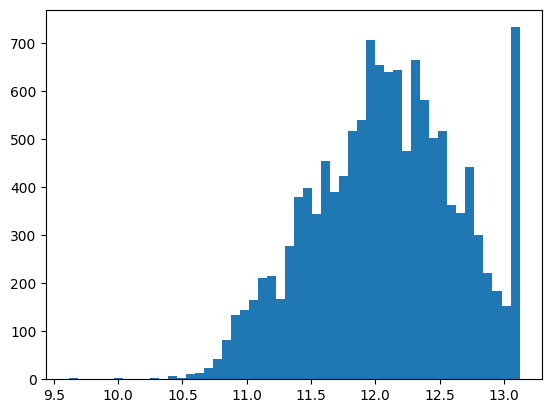

In [219]:
plt.hist(y_train_2, bins = 50);

In [220]:
y_val_2 = np.log1p(y_val)

In [221]:
X_train_2

housing_median_age  longitude  latitude  ocean_proximity_<1H OCEAN  \
0                    34.0    -119.17     34.17                        0.0   
1                    24.0    -118.10     34.08                        1.0   
2                    26.0    -117.99     33.74                        1.0   
3                    52.0    -122.09     41.32                        0.0   
4                    20.0    -118.27     34.92                        0.0   
...                   ...        ...       ...                        ...   
13071                18.0    -117.08     32.76                        0.0   
13072                19.0    -121.32     38.64                        0.0   
13073                33.0    -118.34     33.80                        1.0   
13074                52.0    -122.27     37.77                        0.0   
13075                 5.0    -118.31     33.84                        1.0   

       ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                         0.0                     0.0   
1                         0.0                     0.0   
2                         0.0                     0.0   
3                         1.0                     0.0   
4                         1.0                     0.0   
...                       ...                     ...   
13071                     0.0                     0.0   
13072                     1.0                     0.0   
13073                     0.0                     0.0   
13074                     0.0                     0.0   
13075                     0.0                     0.0   

       ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  total_rooms  \
0                           0.0                         1.0     0.380362   
1                           0.0                         0.0     1.040524   
2                           0.0                         0.0     0.901989   
3                           0.0                         0.0     0.886812   
4                           0.0                         0.0    -1.148633   
...                         ...                         ...          ...   
13071                       0.0                         1.0    -0.257281   
13072                       0.0                         0.0     1.885915   
13073                       0.0                         0.0     0.079680   
13074                       1.0                         0.0    -0.236323   
13075                       0.0                         0.0     0.724717   

       total_bedrooms  population  households  median_income  
0            0.319391    0.991911    0.465533       0.376639  
1            1.526750    1.725182    1.561989      -0.587398  
2            0.757256    0.755671    0.849576       0.528582  
3            0.903359    0.583576    0.786717      -0.943122  
4           -1.225337   -1.340765   -1.260666      -0.390684  
...               ...         ...         ...            ...  
13071        0.457659    0.511345    0.438198      -1.416246  
13072        1.780268    1.577208    1.793456       0.059298  
13073        0.128090   -0.181302   -0.005003       0.811714  
13074       -0.172067   -0.350438   -0.128049       0.351415  
13075        0.976538    1.321194    0.948362      -0.617236  

[13076 rows x 13 columns]

In [222]:
y_train_2

median_house_value
5716            12.131354
7478            12.228817
18048           12.388398
2050            11.049317
16158           11.426289
...                   ...
5233            11.736077
6243            11.973516
14098           12.672636
6591            12.327409
10091           12.286274

[13076 rows x 1 columns]

## Base Lines (Cross-Validation)

In [223]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

model_0 = SVR()
model_1 = LinearRegression()
model_2 = Ridge()
model_3 = Lasso()
model_4 = ElasticNet()

In [224]:
models = [model_0, model_1, model_2, model_3, model_4]

for i in models:
    scores = cross_val_score(i, X_train_2, y_train_2, cv=5, scoring='r2') # neg_root_mean_squared_error
    media = scores.mean()
    estandar = scores.std()
    print(i)
    print(f'Media :{media}, Desv Est: {estandar} ')
    print("----------")

c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataC

SVR()
Media :0.6428634504105594, Desv Est: 0.0107456698840191 
----------
LinearRegression()
Media :0.704237015092088, Desv Est: 0.014258380286914469 
----------
Ridge()
Media :0.7042340399884512, Desv Est: 0.014279506522244547 
----------
Lasso()
Media :-0.0009455978001488674, Desv Est: 0.0008646231898215381 
----------
ElasticNet()
Media :-0.000160665493626877, Desv Est: 0.0006400243325992213 
----------


## Tunning o Hiperparametros --> Después 

## Seleccionar Modelo

In [225]:
X_train_final = pd.concat([X_train_2, X_val_2], axis=0)

In [226]:
y_train_final = pd.concat([y_train_2, y_val_2], axis=0)

In [227]:
y_train_final

median_house_value
5716            12.131354
7478            12.228817
18048           12.388398
2050            11.049317
16158           11.426289
...                   ...
19255           12.170451
11585           12.054674
9428            13.122367
9440            12.611541
9642            12.191979

[16346 rows x 1 columns]

In [228]:
model_1.fit(X_train_final,y_train_final)

LinearRegression()

In [229]:
pred = model_1.predict(X_train_final)
pred

array([[12.28501131],
       [12.01510017],
       [12.40935985],
       ...,
       [12.84129611],
       [12.31684129],
       [11.95289532]])

In [230]:
from sklearn.metrics import r2_score

In [231]:
print('R2 :', r2_score(y_train_final,pred).mean())

R2 : 0.7014556374378595


## Aplicar todo lo que hicimos al train a test

In [232]:
X_test = y_test_set.drop(columns = ['housing_median_age'])
y_test = y_test_set[['housing_median_age']]

In [233]:
X_test

longitude  latitude  total_rooms  total_bedrooms  population  \
14425    -114.47     34.40       7650.0          1901.0      1129.0   
16398    -118.48     34.16       2108.0           309.0       769.0   
7721     -118.32     34.19       1335.0           249.0       485.0   
1411     -118.28     33.75        393.0           189.0       429.0   
1336     -122.47     37.75       2399.0           426.0       911.0   
...          ...       ...          ...             ...         ...   
8285     -116.85     34.25       5806.0          1030.0       569.0   
6264     -118.51     34.19       2537.0           418.0      1161.0   
2999     -121.94     37.28       2859.0           464.0      1144.0   
13452    -120.19     36.60        875.0           214.0       931.0   
14809    -118.39     33.90       4314.0           725.0      1699.0   

       households  median_income  median_house_value ocean_proximity  
14425       463.0         1.8200             80100.0          INLAND  
16398       274.0         8.7172            500001.0       <1H OCEAN  
7721        240.0         4.1731            352100.0       <1H OCEAN  
1411        188.0         1.8393            187500.0      NEAR OCEAN  
1336        423.0         4.4312            361000.0        NEAR BAY  
...           ...            ...                 ...             ...  
8285        219.0         4.0132            163100.0          INLAND  
6264        421.0         5.3028            229200.0       <1H OCEAN  
2999        430.0         5.0822            327500.0       <1H OCEAN  
13452       214.0         1.5536             58300.0          INLAND  
14809       718.0         8.2037            500001.0       <1H OCEAN  

[4087 rows x 9 columns]

One Hot encorder

In [234]:
encoded = enc.transform(X_test[['ocean_proximity']])
encoded_df = pd.DataFrame(encoded, columns=enc.get_feature_names_out(['ocean_proximity']))

X_test_encoded = pd.concat([X_test, encoded_df], axis=1)
X_test_encoded.drop(['ocean_proximity'], axis=1, inplace=True)

In [ ]:
pred_2 = model_1.predict(X_t)
pred_2